# Exercise 4 Snow

Since in our area of study, the Jucar basin, there is no snow precipitation during the winter months we will execute this exercise on the Aare basin of group 1, since they were so kind to give us their forcing data and elevation.


For the "Case 1" of the first exercise, we will compute the snow accumulation over time pretending that the entire basin has the same elevation, equal to the place where the measurements were taken (around 1546m). The temperature, in fact, refers to the station CAMELS_CH_2135, measured as the average temperature at 1546 mslm of elevation. The results are presented below: 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg

In [12]:
filename = 'CAMELS_CH_obs_based_2135.csv'
data = pd.read_csv(filename,index_col=0, usecols=[0, 4, 6])
data.index= pd.to_datetime(data.index)
data.head()


,precipitation(mm/d),temperature_mean(degC)
date,,
1981-01-01,2.57,-3.52
1981-01-02,8.02,-5.26
1981-01-03,41.91,-1.17
1981-01-04,29.87,-3.26
1981-01-05,5.84,-8.70


## Case 1
We will calculate the snow accumulation considering a constant elevation of the basin (1546 m) since the data we have in the station is at this elevation.

In [13]:
Er = 1546 #elevation [m]
T_th = -0.5 #threshold temp [°C]
F_M = 3 #melt factor [mm/°C*d]
N = len(data['precipitation(mm/d)'])

dt = 1

S_snow = np.zeros(N)
M = np.zeros(N)
P = data['precipitation(mm/d)']
T = data['temperature_mean(degC)']
Pr = np.zeros(N)
Pl = np.zeros(N)
Ps = np.zeros(N)

dt = 1



C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\3460482352.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(T[i]<=T_th):
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\3460482352.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ps[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\3460482352.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(T[i]>T_th):
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_3

            precipitation(mm/d)  temperature_mean(degC)   Snow    M   Pr   Pl  \
date                                                                            
1981-01-01                 2.57                   -3.52   0.00  0.0  0.0  0.0   
1981-01-02                 8.02                   -5.26   8.02  0.0  0.0  0.0   
1981-01-03                41.91                   -1.17  49.93  0.0  0.0  0.0   
1981-01-04                29.87                   -3.26  79.80  0.0  0.0  0.0   
1981-01-05                 5.84                   -8.70  85.64  0.0  0.0  0.0   
...                         ...                     ...    ...  ...  ...  ...   
2020-12-27                 0.11                   -3.87  25.43  0.0  0.0  0.0   
2020-12-28                 2.74                   -4.31  28.17  0.0  0.0  0.0   
2020-12-29                 0.43                   -4.60  28.60  0.0  0.0  0.0   
2020-12-30                 0.44                   -6.03  29.04  0.0  0.0  0.0   
2020-12-31                 1

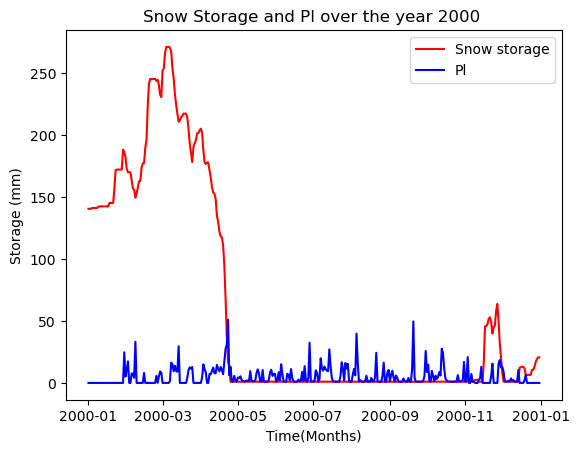

In [14]:
for i in np.arange(1 , N ,dt):
    if(T[i]<=T_th):
        Pr[i] = 0
        Ps[i] = P[i]
        S_snow[i] = S_snow[i-1] + Ps[i]*dt
    
    if(T[i]>T_th):
        Pr[i] = P[i]
        M[i] = np.minimum(S_snow[i-1]*dt, F_M*(T[i]- T_th))
        S_snow[i] = S_snow[i-1] - M[i]+dt 
        Pl[i] = Pr[i] + M[i]

data['Snow'] = S_snow
data['M'] = M
data['Pr'] = Pr
data['Pl'] = Pl
data['Ps'] = Ps

datemask = (data.index.year == 2000)
print(data)

print(datemask)
plt.figure()
plt.plot(data.index[datemask], S_snow[datemask], label='Snow storage', color='red')
plt.plot(data.index[datemask], Pl[datemask], label='Pl', color='blue')
plt.xlabel('Time(Months)')
plt.ylabel('Storage (mm)')
plt.title('Snow Storage and Pl over the year 2000 ')
plt.legend()
plt.show()

## Case 2

Now we will consider also the elevation difference in the whole basin, dividing into elevation bands each one of them associated to a area fraction.
The areas are provided thanks to the kindness of group 1. 

| Elevation Range (m) | Reference Elevation (m) | Area (km²) |
|---------------------|------------------------|------------|
| 468 - 700         | 584                    | 597.59     |
| 700 - 1000        | 850                    | 424.57     |
| 1000 - 1300       | 1150                   | 357.95     |
| 1300 - 1600       | 1450                   | 410.60     |
| 1600 - 1900       | 1750                   | 461.69     |
| 1900 - 2500       | 2200                   | 597.91     |
| 2500 - 3000       | 2750                   | 286.96     |
| 3000 - 3500       | 3250                   | 101.12     |
| 3500 - 4000       | 3750                   | 24.65      |




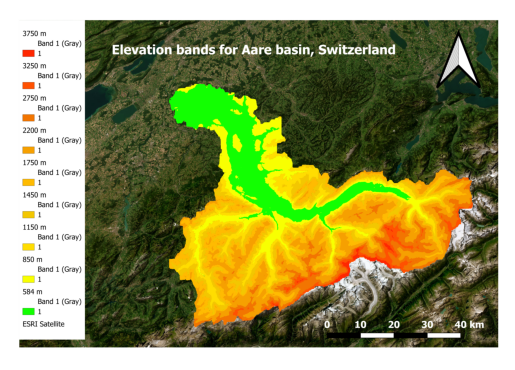

In [15]:
plt.figure()

img = mpimg.imread('elevation bands aare.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
T_T = -0.5
F_M = 3
E_R = 1546 #elevation of measurements
dt = 1
E = np.array([584, 850, 1150, 1450, 1750, 2200, 2750, 3250, 3750]) # for our specific elevations 
# areas in pixels
areas_pixels = [1291591, 917199, 774872, 888913, 999020, 1293564, 620479, 218593, 53305]

# Conversion factor (m² to km²)
conversion_factor = (21.51 ** 2) / 1_000_000

ai = np.array([a * conversion_factor for a in areas_pixels])
A_tot = sum(ai)

S_snow2j = np.zeros([N,len(ai)])
S_snow2tot = np.zeros(N)
M2 = np.zeros([N,len(ai)])
Tr2 = data['temperature_mean(degC)']
T = np.zeros([N,len(ai)])
P2 = data['precipitation(mm/d)']
Pr2 = np.zeros(N)
Plj = np.zeros([N,len(ai)])
Pl_tot = np.zeros(N)
Ps2 = np.zeros(N)

fi = np.array(ai/A_tot)



C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\1649031871.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\1649031871.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\1649031871.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ps[i] = P[i]


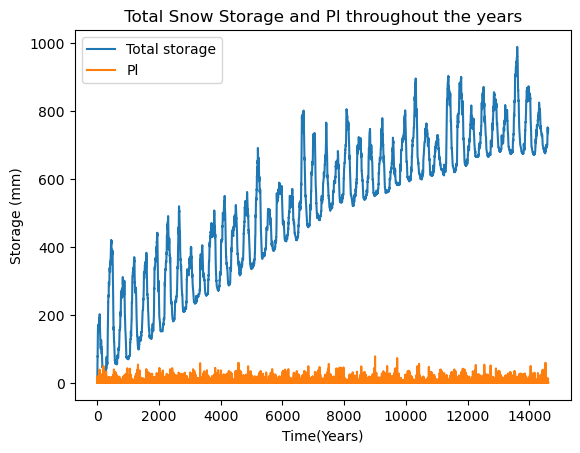

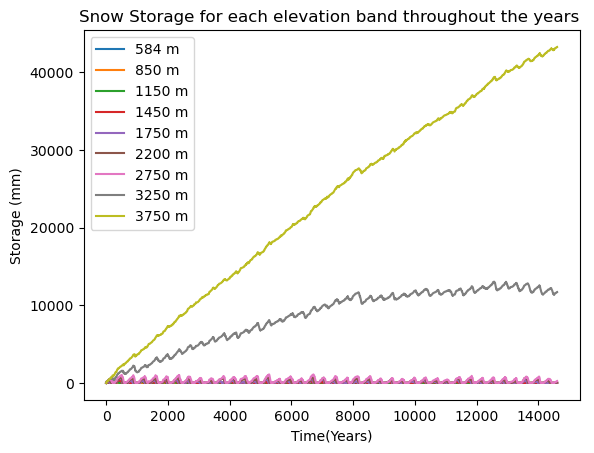

In [17]:
for i in np.arange(1 , N ,dt):
    for j in np.arange(0,len(ai)):
        T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
        if(T[i,j]<=T_th):
            Pr[i] = 0
            Ps[i] = P[i]
            S_snow2j[i,j] = S_snow2j[i-1,j] + Ps[i]*dt
            Plj[i,j] = 0

    
        if(T[i,j]>T_th):
            Pr[i] = P[i]
            M2[i,j] = np.minimum(S_snow2j[i-1,j]/dt, F_M*(T[i,j]- T_th))
            S_snow2j[i,j] = S_snow2j[i-1,j] - M2[i,j]*dt 
            Plj[i,j] = Pr[i] + M2[i,j]
    S_snow2tot[i] = np.sum(fi*S_snow2j[i,:])
    #S_snow2tot[i] = f1*S_snow2j[i,0] + f2*S_snow2j[i,1] + f3*S_snow2j[i,2] +f4*S_snow2j[i,3]
    Pl_tot[i] = np.sum(fi*Plj[i,:])
    #Pl_tot[i] = f1*Plj[i,0] + f2*Plj[i,1] + f3*Plj[i,2] +f4*Plj[i,3]

t = np.arange(1,N+1)

plt.plot(t,S_snow2tot, label = 'Total storage')
plt.plot(t,Pl_tot, label = 'Pl')
plt.xlabel('Time(Years)')
plt.ylabel('Storage (mm)')
plt.title(' Total Snow Storage and Pl throughout the years ')
plt.legend()
plt.show()

plt.plot(t, S_snow2j, label = ['584 m', '850 m', '1150 m', '1450 m', '1750 m', '2200 m', '2750 m', '3250 m', '3750 m'])
plt.xlabel('Time(Years)')
plt.ylabel('Storage (mm)')
plt.title('Snow Storage for each elevation band throughout the years ')
plt.legend()
plt.show()

## Case 3

For case 3, the same exercise is done as in case 2, but now with a temperature increase of 2 degrees.

In [18]:
# increase temp with 2 degrees
T1 = data['temperature_mean(degC)'] + 2

print(T1)


date
1981-01-01   -1.52
1981-01-02   -3.26
1981-01-03    0.83
1981-01-04   -1.26
1981-01-05   -6.70
              ... 
2020-12-27   -1.87
2020-12-28   -2.31
2020-12-29   -2.60
2020-12-30   -4.03
2020-12-31   -3.78
Name: temperature_mean(degC), Length: 14610, dtype: float64


C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\2077365301.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T[i,j] = T1[i] - 0.6*(E[j]-Er)/100
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\2077365301.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_30608\2077365301.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ps[i] = P[i]


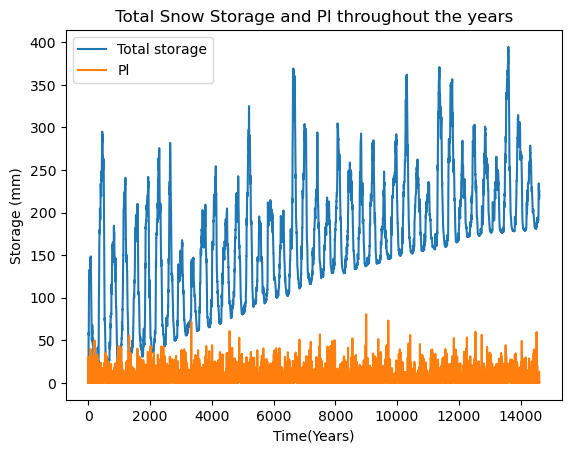

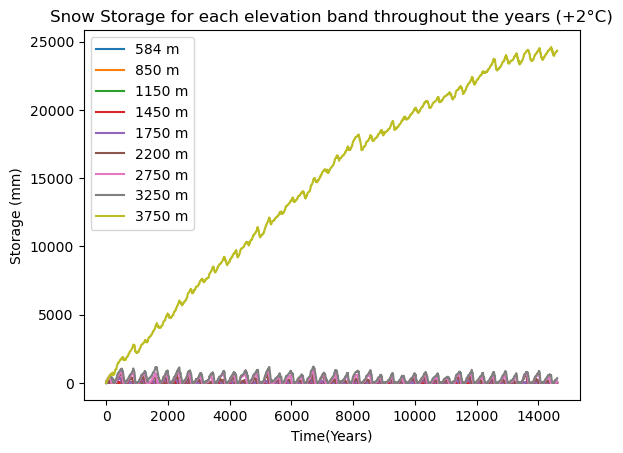

In [22]:
for i in np.arange(1 , N ,dt):
    for j in np.arange(0,len(ai)):
        T[i,j] = T1[i] - 0.6*(E[j]-Er)/100
        if(T[i,j]<=T_th):
            Pr[i] = 0
            Ps[i] = P[i]
            S_snow2j[i,j] = S_snow2j[i-1,j] + Ps[i]*dt
            Plj[i,j] = 0

    
        if(T[i,j]>T_th):
            Pr[i] = P[i]
            M2[i,j] = np.minimum(S_snow2j[i-1,j]/dt, F_M*(T[i,j]- T_th))
            S_snow2j[i,j] = S_snow2j[i-1,j] - M2[i,j]*dt 
            Plj[i,j] = Pr[i] + M2[i,j]
    S_snow2tot[i] = np.sum(fi*S_snow2j[i,:])
    #S_snow2tot[i] = f1*S_snow2j[i,0] + f2*S_snow2j[i,1] + f3*S_snow2j[i,2] +f4*S_snow2j[i,3]
    Pl_tot[i] = np.sum(fi*Plj[i,:])
    #Pl_tot[i] = f1*Plj[i,0] + f2*Plj[i,1] + f3*Plj[i,2] +f4*Plj[i,3]

t = np.arange(1,N+1)

plt.plot(t,S_snow2tot, label = 'Total storage')
plt.plot(t,Pl_tot, label = 'Pl')
plt.xlabel('Time(Years)')
plt.ylabel('Storage (mm)')
plt.title(' Total Snow Storage and Pl throughout the years ')
plt.legend()
plt.show()


plt.plot(t, S_snow2j, label = ['584 m', '850 m', '1150 m', '1450 m', '1750 m', '2200 m', '2750 m', '3250 m', '3750 m'])
plt.xlabel('Time(Years)')
plt.ylabel('Storage (mm)')
plt.title('Snow Storage for each elevation band throughout the years (+2°C)')
plt.legend()
plt.legend()
plt.show()

It can be noticed that the stored water as snow is decreasing a lot with a temperature increase of only 2°C.